# <p><strong>*Экономическое исследование датасета  Credit Risk* 
# <u> *Перцева Мария  2МЭО1* </u>

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import seaborn as sns 
import scipy.stats as stats
import io
import re
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/MariaPertseva/Econometrica/main/Credit%20crisk.csv')
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


# Описание данных
># *Датасет содержит данные о клиентах, получивших кредит. Он состоит из следующих показателей:*
> ## 1. *Clientid* - идентификационный номер каждого клиента
>## 2. *Loan* - сумма кредита
>## 3. *Income* - доход клиента
>## 4. *Age* - возраст клиента
>## 5. *Default* - риск дефолта (кредитный риск)

# Составим регрессионную модель  log-log зависимости суммы кредита от дохода и возраста: log(loan) на log(income), log(age)
- В последующем анализе будем опираться именно на данную регрессию

# Спецификация регрессии
$$
log(loan)=\beta_0+\beta_1*log(income)+\beta_2*log(age)+\beta_3*default
$$
 ### где loan - сумма кредита, income - доход, age - возраст, default - риск дефолта (кредитный риск)

In [16]:
fitted_line = smf.ols(formula='np.log(loan)~np.log(income)+np.log(age)+default', data=df).fit() 
fitted_line.summary()

/Users/fernanduhobrinskij/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(loan)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     193.3
Date:                Tue, 16 May 2023   Prob (F-statistic):          5.13e-110
Time:                        13:40:11   Log-Likelihood:                -2662.7
No. Observations:                1994   AIC:                             5333.
Df Residuals:                    1990   BIC:                             5356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.7903      0.692     -6.923      0.000      -6.147      -3.433
np.log(income)     0.9912      0.060     16.556      0.000       0.874       1.109
np.log(age)        0.5717      0.066      8.703      0.000       0.443       0.701
default            1.1777      0.066     17.729      0.000       1.047       1.308
==============================================================================
Omnibus:                      843.619   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4401.319
Skew:                          -1.958   Prob(JB):                         0.00
Kurtosis:                       9.135   Cond. No.                         382.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
fitted_line.params.round(2)

Intercept        -4.79
np.log(income)    0.99
np.log(age)       0.57
default           1.18
dtype: float64

# Интерпретация регрессии
$$
log(loan)=-4,79+0,99*log(income)+0,57*log(age)+1,18*default
$$
- Рассматривая данную регрессию зависимости суммы кредита от дохада и возраста можно сделать следующий вывод: при увеличении дохода на 1% размер кредита увеличивается на 0.99%, при увеличении возраста на 1% размер кредита увеличивается на 0.57%

# Составим регрессионную модель  level-log зависимости суммы кредита от дохода и возраста: loan на log(income), log(age)

# Спецификация регрессии
$$
loan=\beta_0+\beta_1*log(income)+\beta_2*log(age)+\beta_3*default
$$
 ### где loan - сумма кредита, income - доход, age - возраст, default - риск дефолта (кредитный риск)

In [7]:
fitted_line1 = smf.ols(formula='loan~np.log(income)+np.log(age)+default', data=df).fit() 
fitted_line1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loan   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     407.4
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.82e-206
Time:                        08:09:17   Log-Likelihood:                -18347.
No. Observations:                1994   AIC:                         3.670e+04
Df Residuals:                    1990   BIC:                         3.672e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.576e+04   1803.732    -25.371      0.000   -4.93e+04   -4.22e+04
np.log(income)  3941.8806    156.061     25.259      0.000    3635.820    4247.942
np.log(age)     2069.1143    171.248     12.083      0.000    1733.271    2404.958
default         4247.9709    173.145     24.534      0.000    3908.407    4587.535
==============================================================================
Omnibus:                       12.420   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.128
Skew:                           0.133   Prob(JB):                      0.00383
Kurtosis:                       2.748   Cond. No.                         382.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
fitted_line1.params.round(2)

Intercept        -45762.45
np.log(income)     3941.88
np.log(age)        2069.11
default            4247.97
dtype: float64

# Интерпретация регрессии
$$
loan=-45762.45+3941.88*log(income)+2069.11*log(age)+4247.97*default
$$
- При увеличении дохода на 1% размер кредита увеличивается на 39.42 ден. ед. При увеличении возраста на 1% размер кредита увеличивается на 20.69 ден. ед.

# Составим регрессионную модель  log-level зависимости суммы кредита от дохода и возраста: log(loan) на income, age

# Спецификация регрессии
$$
log(loan)=\beta_0+\beta_1*income+\beta_2*age+\beta_3*default
$$
 ### где loan - сумма кредита, income - доход, age - возраст, default - риск дефолта (кредитный риск)

In [14]:
fitted_line2 = smf.ols(formula='np.log(loan)~income+age+default', data=df).fit() 
fitted_line2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(loan)   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     183.7
Date:                Tue, 16 May 2023   Prob (F-statistic):          3.66e-105
Time:                        13:09:57   Log-Likelihood:                -2677.5
No. Observations:                1997   AIC:                             5363.
Df Residuals:                    1993   BIC:                             5385.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2781      0.102     61.423      0.000       6.078       6.479
income      2.343e-05   1.45e-06     16.188      0.000    2.06e-05    2.63e-05
age            0.0132      0.002      7.822      0.000       0.010       0.016
default        1.1329      0.066     17.219      0.000       1.004       1.262
==============================================================================
Omnibus:                      828.445   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4242.583
Skew:                          -1.921   Prob(JB):                         0.00
Kurtosis:                       9.019   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
fitted_line2.params.round(9)

Intercept    6.278085
income       0.000023
age          0.013184
default      1.132851
dtype: float64

# Интерпретация регрессии
$$
log(loan)=6.278085+0.000023*income+0.013184*age+1.132851*default
$$
- При увеличении возраста на 1 год размер кредита увеличивается на 1%.  При увеличении дохода на 1 ден.ед. размер кредита увеличивается на 0.0023%

# Составим регрессионную модель  level-level зависимости суммы кредита от дохода и возраста: loan на income, age

# Спецификация регрессии
$$
loan=\beta_0+\beta_1*income+\beta_2*age+\beta_3*default
$$
 ### где loan - сумма кредита, income - доход, age - возраст, default - риск дефолта (кредитный риск)

In [11]:
fitted_line3 = smf.ols(formula='loan~income+age+default', data=df).fit() 
fitted_line3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loan   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     399.9
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.60e-203
Time:                        08:09:22   Log-Likelihood:                -18382.
No. Observations:                1997   AIC:                         3.677e+04
Df Residuals:                    1993   BIC:                         3.679e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2459.7150    265.990     -9.247      0.000   -2981.362   -1938.068
income         0.0953      0.004     25.291      0.000       0.088       0.103
age           49.1137      4.386     11.198      0.000      40.512      57.715
default     4109.8674    171.206     24.005      0.000    3774.106    4445.629
==============================================================================
Omnibus:                       10.062   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.592
Skew:                           0.138   Prob(JB):                      0.00826
Kurtosis:                       2.802   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
fitted_line3.params.round(2)

Intercept   -2459.71
income          0.10
age            49.11
default      4109.87
dtype: float64

# Интерпретация регрессии
$$
loan=-2459.71+0.10*income+49.11*age+4109.87*default
$$
- При увеличении дохода на 1 ден. ед. размер кредита увеличивается на 0.1 ден. ед. При увеличении возраста на 1 год размер кредита увеличивается на 49.11 ден. ед.

# Поскольку все переменные не отрицательные, но при этом довольно разные по единицам измерения необходимо применить метод линеаризации, то есть логарифмировать все исследуемые показатели и привести их к одному виду.

In [13]:
df['loan']=np.log(df['loan'])
df['income']=np.log(df['income'])
df['age']=np.log(df['age'])
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,clientid,income,age,loan,default
0,1,11.099770,4.077826,9.000425,0
1,2,10.446252,3.873639,8.789469,0
2,3,10.956356,4.144848,8.989813,0
3,4,10.662177,3.823235,8.716641,0
4,5,11.111742,2.922319,9.079103,1
...,...,...,...,...,...
1995,1996,10.989032,3.881939,7.563579,0
1996,1997,11.149314,3.142518,8.161425,0
1997,1998,10.698998,3.332817,8.616638,1
1998,1999,10.686385,4.158442,7.391861,0


# Диаграмма разброса (рассеивания) свидетельствует о наличии взаимосвязи между двумя переменными и о ее величине. Направление кластера точек говорит о виде взаимосвязи между двумя переменными, а «сжатость» кластера точек - о силе взаимосвязи. Корреляция между парными данными будет тем сильнее, чем больше этот кластер имеет сходство с прямой линией.

# Построим диаграмму рассеяния loan vs income с "подогнанной" прямой

<AxesSubplot:xlabel='income', ylabel='loan'>

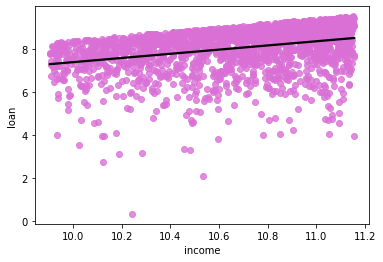

In [14]:
sns.regplot(data=df, y='loan', x='income', ci=None, color = 'orchid', line_kws={"color": "black"})

# Изменим порядок независимой переменной регрессии и построим график

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


<AxesSubplot:xlabel='income', ylabel='loan'>

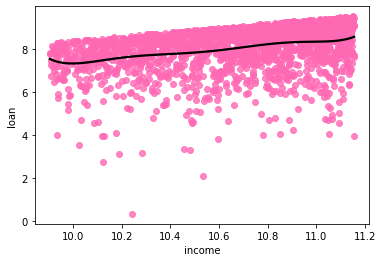

In [15]:
sns.regplot(data=df, y='loan', x='income',order=7, ci=None, color ='hotpink', line_kws={"color": "black"})

# Интерпертация
## Изменение порядка регрессионной кривой  не даёт видимого увеличения точности модели.

# Построим диаграмму рассеяния loan vs age с "подогнанной" прямой

<AxesSubplot:xlabel='age', ylabel='loan'>

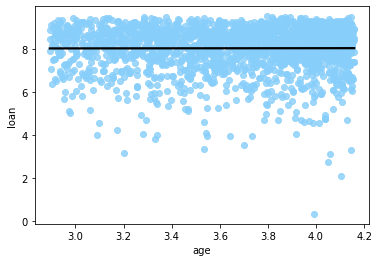

In [16]:
sns.regplot(data=df, y='loan', x='age', ci=None, color = 'lightskyblue', line_kws={"color": "black"})

# Изменим порядок независимой переменной регрессии и построим график

<AxesSubplot:xlabel='age', ylabel='loan'>

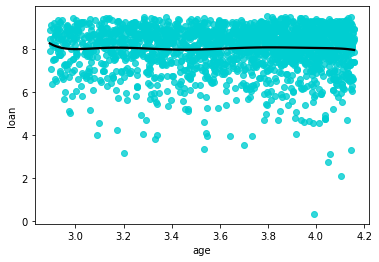

In [17]:
sns.regplot(data=df, y='loan', x='age', ci=None, order=7, color = 'darkturquoise', line_kws={"color": "black"})

# Интерпертация
## Изменение порядка регрессионной кривой не даёт видимого увеличения точности модели.

# Проведем дисперсионный анализ для основной регрессии log-log

In [19]:
# Вычислим объяснённую сумму квадратов, используя регрессионную модель log-log
fitted_line.ess.round(2)

491.69

In [20]:
# Вычислим полную сумму квадратов, используя регрессионную модель log-log
fitted_line.centered_tss.round(2)

2178.79

In [21]:
# Вычислим остаточную сумму квадратов, используя регрессионную модель log-log
fitted_line.ssr.round(2)

1687.1

# Вычислим коэффициент детермиинации и исправленный коэффициент детерминации для регрессии log-log

In [22]:
# Вычислим коэффициент детерминации, используя регрессионную модель
fitted_line.rsquared.round(2)

0.23

In [23]:
fitted_line.rsquared_adj.round(2)

0.22

# Интерпретация: 
- точность подбора уравнения регрессии низкая, так как  идеальная модель регрессии существует в случае коэффициента детерминации равного 1. 
- чем ближе R2 к 1, тем выше качество подгонки (оценки) регрессии 
#### В конкретном случае низкая значимость модели.

# График матрицы рассеяния

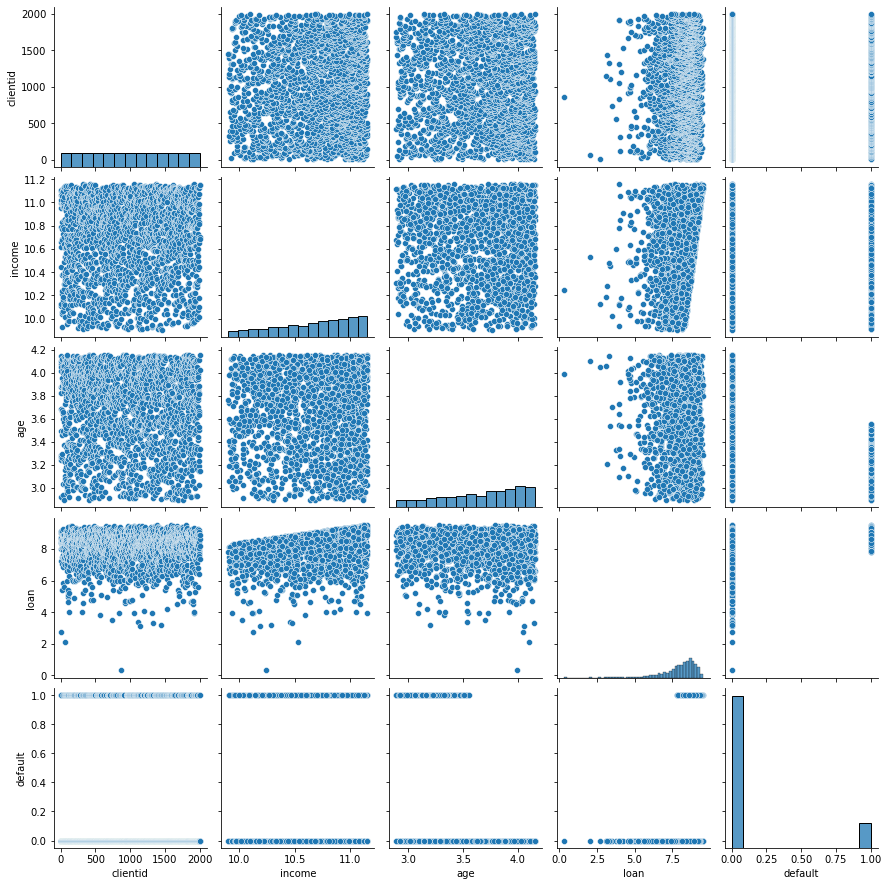

In [24]:
sns.pairplot(df)
plt.show()

#### В многомерной статистике и теории вероятностей матрица рассеяния - это статистика, которая используется для получения оценок ковариационной матрицы. На главной диагонали матрицы располагаются гистограммы для каждой переменной, показывающие ее распределение. В остальных ячейках матрицы располагаются графики рассеяния для пар переменных, где ось абсцисс соответствует одной переменной, а ось ординат - другой переменной.

# Проверка коэффициентов на значимость 

In [25]:
Vl=fitted_line.summary(alpha=0.05).tables[1]
Vl

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.7903,0.692,-6.923,0.000,-6.147,-3.433
np.log(income),0.9912,0.060,16.556,0.000,0.874,1.109
np.log(age),0.5717,0.066,8.703,0.000,0.443,0.701
default,1.1777,0.066,17.729,0.000,1.047,1.308


In [26]:
fitted_line.t_test('np.log(income)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9912      0.060     16.556      0.000       0.874       1.109

In [27]:
t_cr0=stats.t.ppf(1-0.05/2,len(df)-4)
t_cr0.round(3)

1.961

In [28]:
fitted_line.t_test('np.log(age)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5717      0.066      8.703      0.000       0.443       0.701

In [29]:
t_cr1=stats.t.ppf(1-0.05/2,len(df)-4)
t_cr1.round(3)

1.961

# Интерпретация
## Критическое значение Стьюдента в обоих случаях  меньше чем наблюдаемые значения, что свидетельствует, что коэффициент log(income) и log(age) значимы. Зарлата, также как и возраст влияют на размер получаемого кредита.

# Убедимся в значимости коэффициентов: 

In [30]:
string='''coef  std.err  t
Intercept  -4.7903  0.692  -6.923
np.log(income)  0.9912 0.060 16.556
np.log(age)  0.5717  0.066  8.703
default  1.1777  0.066  17.729'''

In [31]:
VLU=pd.read_csv(io.StringIO(string), sep='\s+')
VLU

,coef,std.err,t
Intercept,-4.7903,0.692,-6.923
np.log(income),0.9912,0.060,16.556
np.log(age),0.5717,0.066,8.703
default,1.1777,0.066,17.729


In [32]:
VLU['Значение'] =np.abs(VLU['coef']/VLU['std.err'])
VLU

,coef,std.err,t,Значение
Intercept,-4.7903,0.692,-6.923,6.922399
np.log(income),0.9912,0.060,16.556,16.520000
np.log(age),0.5717,0.066,8.703,8.662121
default,1.1777,0.066,17.729,17.843939


In [33]:
alpha = 0.05
t_cr = stats.t.ppf(1 - alpha/2, len(df)-4)
t_cr

1.9611532059576324

In [34]:
VLU['Значимость'] = VLU.apply(lambda x : 'значимо' if abs(x['Значение']) > t_cr1 else 'не значимо', axis=1)
VLU

,coef,std.err,t,Значение,Значимость
Intercept,-4.7903,0.692,-6.923,6.922399,значимо
np.log(income),0.9912,0.060,16.556,16.520000,значимо
np.log(age),0.5717,0.066,8.703,8.662121,значимо
default,1.1777,0.066,17.729,17.843939,значимо


# Согласно таблице t-критерия Стьюдента, все значения t-статистики – значимы, то есть loan - сумма кредита, income - доход, age - возраст, default - риск дефолта (кредитный риск) статистически значимы.

# Оценим регрессию на наличие мультиколлинеарности
### *Построим матрицу корреляций*

- Исключим проблему мультиколлинеарности, а именно, когда две или более независимые переменные сильно коррелируют между собой. Это может затруднить интерпретацию результатов регрессионного анализа и привести к неустойчивым оценкам параметров модели. 


- Корреляционная матрица – это таблица, которая показывает коэффициенты корреляции между двумя или более переменными. Эти коэффициенты корреляции могут помочь понять, какие переменные сильно взаимосвязаны между собой и как они влияют друг на друга. Значение коэффициента корреляции близкое к 1 или -1 указывает на сильную корреляцию между переменными, тогда как значение, близкое к 0, указывает на отсутствие корреляции.

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/MariaPertseva/Econometrica/main/Credit%20crisk.csv')
numeric_col = ['loan', 'income', 'age', 'default']
corr = data.loc[:,numeric_col].corr()
print(corr)

             loan    income       age   default
loan     1.000000  0.441117  0.002309  0.377160
income   0.441117  1.000000 -0.033687  0.002284
age      0.002309 -0.033687  1.000000 -0.429759
default  0.377160  0.002284 -0.429759  1.000000


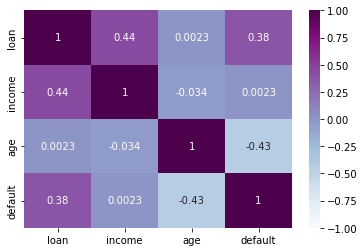

In [36]:
pearson = data.loc[:,numeric_col].corr()
sns.heatmap(data=pearson,
            annot=True, vmin=-1, vmax=1, center= 0, cmap="BuPu");

- Влияние одной величины на изменение других затруднительно оценить, рассматривая табличные значения. Однако, при построении корреляционной матрици Пирсона в тепловом изображении дает больше возможностей для анализа корреляции величин. Коэффициент корреляции колеблется в пределах от -1 до +1. 
- В случае, если корреляция = 0  следовательно две переменные не зависят друг от друга. 
- Положительная корреляция указывает на то, что переменные движутся в одном направлении, а отрицательная корреляция указывает на противоположное.
- Анализирую корреляционную матрицу для нашей регрессии, можно сказать, что значение 1 достигается только на диагонали (что нормально, так как коэффициент коррелирует сам с собой), в остальных же случаях корреляция небольшая (колеблется в пределах границ) => можно сделать вывод, что мультиколинеарности нет.

# Проверка коэффициентов на совместную значимость 


$$
H_0:log(income)=default=0
$$

In [37]:
fitted_linef = smf.ols(formula='np.log(loan)~np.log(income)+default', data=df).fit() 
R2_1=fitted_line.rsquared.round(3)
R2_1

0.226

In [38]:
R2_2=fitted_linef.rsquared.round(3)
R2_2

0.137

In [39]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.226         0.137'))
F_nab=(unrest-rest)/(1-unrest)*(len(df)-4)/2
F_nab
F_nab.round(3)

114.757

In [40]:
alpha=0.05
F_cr = stats.f.ppf(1-alpha,2,len(Vl)-4)
F_cr.round(3)

199.5

$ F_{nabl}<F_{cr} =>$ *совместное влияние коэффициентов **log(income) и default** незначимо, гипотеза **H0** отвергается*

$$
H_0:log(age)=default=0
$$

In [41]:
fitted_linef1 = smf.ols(formula='np.log(loan)~np.log(age)+default', data=df).fit() 
R2_1=fitted_line.rsquared.round(3)
R2_1

0.226

In [42]:
R2_2=fitted_linef1.rsquared.round(3)
R2_2

0.08

In [43]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.226         0.08'))
F_nab=(unrest-rest)/(1-unrest)*(len(df)-4)/2
F_nab.round(3)

188.253

In [44]:
alpha=0.05
F_cr = stats.f.ppf(1-alpha,2,len(Vl)-4)
F_cr.round(3)

199.5

$ F_{nabl}<F_{cr} =>$  *совместное влияние коэффициентов **log(age) и default** незначимо, гипотеза **H0** отвергается*

$$
H_0:log(age)=log(income)=0
$$

In [45]:
fitted_linef2 = smf.ols(formula='np.log(loan)~np.log(age)+np.log(income)', data=df).fit() 
R2_1=fitted_line.rsquared.round(3)
R2_1

0.226

In [46]:
R2_2=fitted_linef2.rsquared.round(3)
R2_2

0.073

In [47]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.226         0.073'))
F_nab=(unrest-rest)/(1-unrest)*(len(df)-4)/2
F_nab.round(3)

197.279

In [48]:
alpha=0.05
F_cr = stats.f.ppf(1-alpha,2,len(Vl)-4)
F_cr.round(3)

199.5

$ F_{nabl}<F_{cr} =>$  *совместное влияние коэффициентов **log(age) и log(income)**незначимо, гипотеза **H0** отвергается*

# Структурные сдвиги
- сложная система изменений взаимосвязанных пропорций

In [62]:
df_default = df[df['default']==1]
df_ddefault = df[df['default']==0]

In [63]:
defu = smf.ols(data=df, formula='np.log(loan)~np.log(income)+np.log(age)').fit()

In [64]:
d_default = smf.ols(data= df_default, formula='np.log(loan)~np.log(income)+np.log(age)').fit()

In [66]:
d_ddefault = smf.ols(data= df_ddefault, formula='np.log(loan)~np.log(income)+np.log(age)').fit()

In [67]:
F_obs=(defu.ssr-(d_default.ssr+d_ddefault.ssr))/(d_default.ssr+d_ddefault.ssr)*((len(df_default)+len(df_ddefault)-2*3)/(3))
F_obs.round(3)

65.409

In [68]:
alpha = 0.05
F_cr=stats.f.ppf(1-alpha,3,len( df_default ) + len( df_ddefault ) - 6  )
F_cr.round(3)

2.609

$ F_{nabl}<F_{cr} =>$ **структурные изменения значимы, что также свидетельствует о неоднородности выборки.** 
#### *Для большей точности результатов стоит рассматривать две регрессии в зависимости от значения default* 

# Доверительный интервал
- Это диапазон значений, который может содержать параметр генеральной совокупности с определенным уровнем достоверности;
- Поскольку регрессия не дает точных значений, поэтому можно воспользоваться доверительным интервалом.

In [18]:
fitted_line.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.7903,0.692,-6.923,0.000,-6.147,-3.433
np.log(income),0.9912,0.060,16.556,0.000,0.874,1.109
np.log(age),0.5717,0.066,8.703,0.000,0.443,0.701
default,1.1777,0.066,17.729,0.000,1.047,1.308


In [19]:
string1='''      
Intercept  -4.7903   0.692
np.log(income)  0.9912  0.060
np.log(age)  0.5717   0.066
default  1.1777  0.066   '''

In [20]:
dn = pd.DataFrame(np.reshape(string1.strip().split(), (4,3) ), columns=['Coeff','Est str','std.err. str'])
dn

,Coeff,Est str,std.err. str
0,Intercept,-4.7903,0.692
1,np.log(income),0.9912,0.060
2,np.log(age),0.5717,0.066
3,default,1.1777,0.066


In [56]:
dn['Estimate'] = dn['Est str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
dn['Std.error'] = dn['std.err. str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
dn

,Coeff,Est str,std.err. str,Estimate,Std.error
0,Intercept,-4.7903,0.692,-4.7903,0.692
1,np.log(income),0.9912,0.060,0.9912,0.060
2,np.log(age),0.5717,0.066,0.5717,0.066
3,default,1.1777,0.066,1.1777,0.066


In [57]:
dn['нижняя'] = (dn['Estimate'] - dn['Std.error']*t_cr1).round(2)
dn['верхняя'] = (dn['Estimate'] + dn['Std.error']*t_cr1).round(2)
dn= dn.drop(['Est str','std.err. str', 'Estimate', 'Std.error'], axis=1)
dn

,Coeff,нижняя,верхняя
0,Intercept,-6.15,-3.43
1,np.log(income),0.87,1.11
2,np.log(age),0.44,0.70
3,default,1.05,1.31


+ Значение коэффициентов регрессии находятся в данных интервалах.

# Тест на гетероскедастичность

# Гипотезы в тесте:
### **H0:** *присутствует гомоскедастичность (остатки равномерно разбросаны)*
### **H1:** *присутствует гетероскедастичность (остатки разбросаны неравномерно)*

In [58]:
df['res2']=fitted_line.resid**2
df['res']=fitted_line.resid

In [59]:
sub_model= smf.ols(data=df, formula='res2~np.log(age)+np.log(income)+default').fit()
St = np.round(len(df)*sub_model.rsquared,2)
St

38.99

In [60]:
Hi2 = stats.chi2.ppf(1-0.05,3)
Hi2.round(2)

7.81

$ St>Hi^2 или  (F_{nabl}>F_{cr}) =>$**тест указывает на гетероскедастичность. Дисперсии стандартных ошибок регрессии различны.**
#### Причины гетероскедастичности:
#### 1. *Неоднородность исследуемых объектов*
#### 2. *Характер наблюдений*

# Анализ модели на автокорреляцию

In [69]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(fitted_line.resid)
round(dw,2)

1.99

- С помощью теста Дарбина-Уотсона можно сделать следующий выводы: 
    1. автокорреляция остатков слабая, поскольку получаемое значение приближается, но не достигает значения 2;
    2. остатки независимы друг от друга.